In [100]:
# 산모 건강 위험 데이터
# 딥러닝으로 산모의 위험도 예측 

In [1]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf

In [2]:
data = pd.read_csv('Maternal Health Risk Data Set.csv')

In [3]:
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
data['RiskLevel']=np.where(data['RiskLevel']=='high risk', 2, np.where(data['RiskLevel']=='mid risk', 1, 0).astype('int')).astype('int')

In [6]:
data['RiskLevel']

0       2
1       2
2       2
3       2
4       0
       ..
1009    2
1010    2
1011    2
1012    2
1013    1
Name: RiskLevel, Length: 1014, dtype: int32

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   int32  
dtypes: float64(2), int32(1), int64(4)
memory usage: 51.6 KB


In [8]:
data.loc[:,:'HeartRate']

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76
...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80
1010,55,120,90,18.0,98.0,60
1011,35,85,60,19.0,98.0,86
1012,43,120,90,18.0,98.0,70


In [9]:
X_data=data.loc[:,:'HeartRate']

In [10]:
y_data=data['RiskLevel']

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_data=to_categorical(y_data) 

In [13]:
data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2
1010,55,120,90,18.0,98.0,60,2
1011,35,85,60,19.0,98.0,86,2
1012,43,120,90,18.0,98.0,70,2


In [14]:
X_data[:3]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80


In [15]:
X_data.shape, y_data.shape

((1014, 6), (1014, 3))

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [17]:
scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, y_data, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=11)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(811, 6) (811, 3)
(203, 6) (203, 3)


In [19]:
# 모델생성
# 심층 신경망 모델
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=6))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [21]:
# 이 모델로 설정을 하겠음(compile)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc','mae'])

In [22]:
# 설정한 레이어들을 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               896       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
 dense_4 (Dense)             (None, 3)                 33        
                                                                 
Total params: 11,595
Trainable params: 11,595
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train, y_train, batch_size=50, epochs=500, verbose=2)

Epoch 1/500
17/17 - 0s - loss: 1.0732 - acc: 0.4846 - mae: 0.4381 - 380ms/epoch - 22ms/step
Epoch 2/500
17/17 - 0s - loss: 0.9983 - acc: 0.5413 - mae: 0.4177 - 22ms/epoch - 1ms/step
Epoch 3/500
17/17 - 0s - loss: 0.9220 - acc: 0.5721 - mae: 0.3922 - 17ms/epoch - 996us/step
Epoch 4/500
17/17 - 0s - loss: 0.8495 - acc: 0.6202 - mae: 0.3641 - 16ms/epoch - 915us/step
Epoch 5/500
17/17 - 0s - loss: 0.8131 - acc: 0.6190 - mae: 0.3418 - 18ms/epoch - 1ms/step
Epoch 6/500
17/17 - 0s - loss: 0.8012 - acc: 0.6252 - mae: 0.3358 - 17ms/epoch - 1ms/step
Epoch 7/500
17/17 - 0s - loss: 0.7837 - acc: 0.6326 - mae: 0.3297 - 18ms/epoch - 1ms/step
Epoch 8/500
17/17 - 0s - loss: 0.7668 - acc: 0.6634 - mae: 0.3226 - 17ms/epoch - 976us/step
Epoch 9/500
17/17 - 0s - loss: 0.7572 - acc: 0.6547 - mae: 0.3195 - 18ms/epoch - 1ms/step
Epoch 10/500
17/17 - 0s - loss: 0.7474 - acc: 0.6547 - mae: 0.3134 - 18ms/epoch - 1ms/step
Epoch 11/500
17/17 - 0s - loss: 0.7363 - acc: 0.6732 - mae: 0.3104 - 19ms/epoch - 1ms/step


Epoch 90/500
17/17 - 0s - loss: 0.5477 - acc: 0.7386 - mae: 0.2385 - 14ms/epoch - 821us/step
Epoch 91/500
17/17 - 0s - loss: 0.5550 - acc: 0.7337 - mae: 0.2317 - 13ms/epoch - 763us/step
Epoch 92/500
17/17 - 0s - loss: 0.5772 - acc: 0.7337 - mae: 0.2405 - 13ms/epoch - 763us/step
Epoch 93/500
17/17 - 0s - loss: 0.5466 - acc: 0.7423 - mae: 0.2308 - 13ms/epoch - 763us/step
Epoch 94/500
17/17 - 0s - loss: 0.5473 - acc: 0.7337 - mae: 0.2403 - 13ms/epoch - 763us/step
Epoch 95/500
17/17 - 0s - loss: 0.5496 - acc: 0.7324 - mae: 0.2316 - 14ms/epoch - 821us/step
Epoch 96/500
17/17 - 0s - loss: 0.5407 - acc: 0.7460 - mae: 0.2331 - 14ms/epoch - 821us/step
Epoch 97/500
17/17 - 0s - loss: 0.5334 - acc: 0.7423 - mae: 0.2296 - 13ms/epoch - 763us/step
Epoch 98/500
17/17 - 0s - loss: 0.5300 - acc: 0.7349 - mae: 0.2321 - 14ms/epoch - 821us/step
Epoch 99/500
17/17 - 0s - loss: 0.5421 - acc: 0.7374 - mae: 0.2342 - 14ms/epoch - 821us/step
Epoch 100/500
17/17 - 0s - loss: 0.5450 - acc: 0.7287 - mae: 0.2337 - 

Epoch 178/500
17/17 - 0s - loss: 0.4658 - acc: 0.7781 - mae: 0.2007 - 14ms/epoch - 821us/step
Epoch 179/500
17/17 - 0s - loss: 0.4612 - acc: 0.7891 - mae: 0.2004 - 15ms/epoch - 880us/step
Epoch 180/500
17/17 - 0s - loss: 0.4630 - acc: 0.7867 - mae: 0.2021 - 12ms/epoch - 704us/step
Epoch 181/500
17/17 - 0s - loss: 0.4543 - acc: 0.7879 - mae: 0.2001 - 13ms/epoch - 763us/step
Epoch 182/500
17/17 - 0s - loss: 0.4565 - acc: 0.7965 - mae: 0.1972 - 13ms/epoch - 763us/step
Epoch 183/500
17/17 - 0s - loss: 0.4544 - acc: 0.7916 - mae: 0.1985 - 14ms/epoch - 821us/step
Epoch 184/500
17/17 - 0s - loss: 0.4603 - acc: 0.7793 - mae: 0.1987 - 14ms/epoch - 821us/step
Epoch 185/500
17/17 - 0s - loss: 0.4632 - acc: 0.8002 - mae: 0.2015 - 14ms/epoch - 821us/step
Epoch 186/500
17/17 - 0s - loss: 0.4590 - acc: 0.7990 - mae: 0.2009 - 14ms/epoch - 821us/step
Epoch 187/500
17/17 - 0s - loss: 0.4696 - acc: 0.7596 - mae: 0.1998 - 15ms/epoch - 880us/step
Epoch 188/500
17/17 - 0s - loss: 0.4535 - acc: 0.7830 - mae:

Epoch 266/500
17/17 - 0s - loss: 0.4102 - acc: 0.8200 - mae: 0.1759 - 15ms/epoch - 880us/step
Epoch 267/500
17/17 - 0s - loss: 0.3849 - acc: 0.8397 - mae: 0.1698 - 14ms/epoch - 821us/step
Epoch 268/500
17/17 - 0s - loss: 0.4118 - acc: 0.8089 - mae: 0.1765 - 14ms/epoch - 821us/step
Epoch 269/500
17/17 - 0s - loss: 0.4107 - acc: 0.8187 - mae: 0.1766 - 14ms/epoch - 821us/step
Epoch 270/500
17/17 - 0s - loss: 0.4258 - acc: 0.8027 - mae: 0.1849 - 14ms/epoch - 821us/step
Epoch 271/500
17/17 - 0s - loss: 0.4169 - acc: 0.8187 - mae: 0.1755 - 14ms/epoch - 821us/step
Epoch 272/500
17/17 - 0s - loss: 0.4368 - acc: 0.8015 - mae: 0.1837 - 14ms/epoch - 821us/step
Epoch 273/500
17/17 - 0s - loss: 0.4202 - acc: 0.7965 - mae: 0.1768 - 14ms/epoch - 821us/step
Epoch 274/500
17/17 - 0s - loss: 0.4096 - acc: 0.8200 - mae: 0.1761 - 14ms/epoch - 821us/step
Epoch 275/500
17/17 - 0s - loss: 0.3984 - acc: 0.8249 - mae: 0.1746 - 14ms/epoch - 821us/step
Epoch 276/500
17/17 - 0s - loss: 0.3814 - acc: 0.8385 - mae:

Epoch 354/500
17/17 - 0s - loss: 0.3897 - acc: 0.8274 - mae: 0.1621 - 14ms/epoch - 821us/step
Epoch 355/500
17/17 - 0s - loss: 0.3957 - acc: 0.8150 - mae: 0.1619 - 14ms/epoch - 821us/step
Epoch 356/500
17/17 - 0s - loss: 0.3653 - acc: 0.8422 - mae: 0.1563 - 15ms/epoch - 880us/step
Epoch 357/500
17/17 - 0s - loss: 0.3375 - acc: 0.8681 - mae: 0.1496 - 15ms/epoch - 880us/step
Epoch 358/500
17/17 - 0s - loss: 0.3456 - acc: 0.8446 - mae: 0.1488 - 15ms/epoch - 880us/step
Epoch 359/500
17/17 - 0s - loss: 0.3535 - acc: 0.8459 - mae: 0.1549 - 15ms/epoch - 880us/step
Epoch 360/500
17/17 - 0s - loss: 0.3533 - acc: 0.8508 - mae: 0.1502 - 15ms/epoch - 880us/step
Epoch 361/500
17/17 - 0s - loss: 0.3423 - acc: 0.8496 - mae: 0.1506 - 14ms/epoch - 821us/step
Epoch 362/500
17/17 - 0s - loss: 0.3736 - acc: 0.8372 - mae: 0.1600 - 14ms/epoch - 821us/step
Epoch 363/500
17/17 - 0s - loss: 0.3688 - acc: 0.8335 - mae: 0.1530 - 14ms/epoch - 821us/step
Epoch 364/500
17/17 - 0s - loss: 0.3396 - acc: 0.8668 - mae:

Epoch 442/500
17/17 - 0s - loss: 0.3299 - acc: 0.8520 - mae: 0.1417 - 15ms/epoch - 880us/step
Epoch 443/500
17/17 - 0s - loss: 0.3141 - acc: 0.8582 - mae: 0.1361 - 14ms/epoch - 821us/step
Epoch 444/500
17/17 - 0s - loss: 0.3458 - acc: 0.8372 - mae: 0.1428 - 14ms/epoch - 821us/step
Epoch 445/500
17/17 - 0s - loss: 0.3298 - acc: 0.8570 - mae: 0.1411 - 15ms/epoch - 880us/step
Epoch 446/500
17/17 - 0s - loss: 0.3123 - acc: 0.8533 - mae: 0.1388 - 14ms/epoch - 821us/step
Epoch 447/500
17/17 - 0s - loss: 0.3089 - acc: 0.8718 - mae: 0.1356 - 15ms/epoch - 880us/step
Epoch 448/500
17/17 - 0s - loss: 0.3168 - acc: 0.8668 - mae: 0.1359 - 15ms/epoch - 880us/step
Epoch 449/500
17/17 - 0s - loss: 0.3202 - acc: 0.8656 - mae: 0.1343 - 15ms/epoch - 880us/step
Epoch 450/500
17/17 - 0s - loss: 0.3105 - acc: 0.8619 - mae: 0.1366 - 14ms/epoch - 821us/step
Epoch 451/500
17/17 - 0s - loss: 0.3189 - acc: 0.8644 - mae: 0.1349 - 15ms/epoch - 880us/step
Epoch 452/500
17/17 - 0s - loss: 0.3204 - acc: 0.8644 - mae:

In [24]:
test_result=model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6091 - acc: 0.7685 - mae: 0.1916


In [25]:
# 다중 분류에서는 predict를 할 때 각 항목이 될 가능성을 계산해준다.
y_pred=model.predict(X_test)

In [26]:
y_pred[0]

array([1.1934626e-05, 1.8649567e-06, 9.9998617e-01], dtype=float32)

In [27]:
y_pred0_index=np.argmax(y_pred[0])

In [28]:
y_pred0_index # predict하여 예측한 각 확률 중 최대값

2

In [30]:
y_test[0] # 실제 위험도는 high risk

array([0., 0., 1.], dtype=float32)

In [32]:
# 예측한 모든 위험도

In [33]:
y_pred_test=np.argmax(y_pred, axis=-1)

In [34]:
y_pred_test

array([2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1,
       1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 0, 0, 2, 0,
       2, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1, 2, 1,
       0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 1, 1, 2, 1,
       2, 0, 0, 1, 0, 1, 2, 2, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1,
       2, 1, 2, 2, 0, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0,
       2, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 2, 1, 2, 2, 0, 0, 0, 2, 1, 1,
       0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0, 1, 1, 1, 1,
       1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       2, 1, 0, 1, 1], dtype=int64)

In [35]:
# 실제 위험도

In [36]:
y_test2=np.argmax(y_test, axis=-1)

In [37]:
y_test2

array([2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2, 0, 0, 0, 2, 0, 1, 0, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0, 1, 2, 1, 0, 1, 2, 0,
       2, 1, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 0, 2, 1,
       0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 2, 2,
       2, 1, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1,
       2, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 1, 1,
       1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       2, 2, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       2, 0, 0, 2, 1], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [39]:
print(accuracy_score(y_test2, y_pred_test))

0.7684729064039408


In [40]:
print(confusion_matrix(y_test2, y_pred_test))

[[58 25  2]
 [ 7 53  5]
 [ 2  6 45]]


In [101]:
# 각 위험군의 test 데이터 적중률 시각화

In [102]:
import matplotlib.pyplot as plt

In [103]:
type(confusion_matrix(y_test2, y_pred_test))

numpy.ndarray

In [104]:
df=pd.DataFrame(confusion_matrix(y_test2, y_pred_test))

In [105]:
df

,0,1,2
0,58,25,2
1,7,53,5
2,2,6,45


In [106]:
df.iloc[1,0]

7

In [107]:
row_risk_score=df.iloc[0,0]/(df.iloc[0,0]+df.iloc[1,0]+df.iloc[2,0])
mid_risk_score=df.iloc[1,1]/(df.iloc[0,1]+df.iloc[1,1]+df.iloc[2,1])
high_risk_score=df.iloc[2,2]/(df.iloc[0,2]+df.iloc[1,2]+df.iloc[2,2])

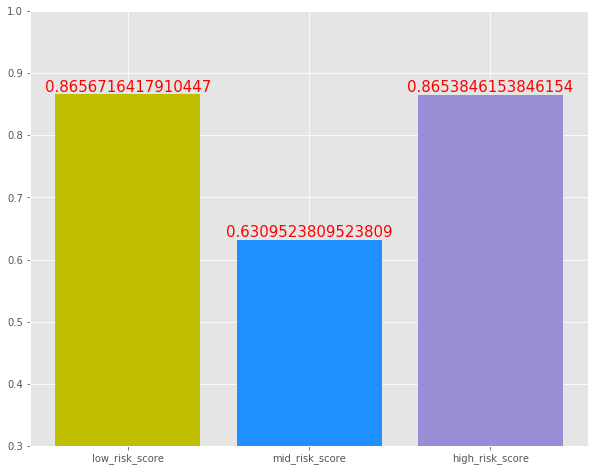

In [108]:
plt.figure(figsize=(10,8))
x = np.arange(3)
risk = ['low_risk_score', 'mid_risk_score', 'high_risk_score']
values = [row_risk_score, mid_risk_score, high_risk_score]
colors = ['y', 'dodgerblue', 'C2']

plt.bar(x, values, color=colors)
plt.xticks(x, risk)
plt.ylim([0.3, 1])

for i, v in enumerate(x):
    plt.text(v, values[i], values[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 15, 
             color='red',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()